# Web Scraping and Analysis of E-Commerce Product Data: Insights into Pricing, Stock, and Trends

This is my first-ever project on web scraping, and it has been an exciting step forward in my journey to understand how data around us can be collected, analyzed, and used to drive meaningful decisions. With this project, I explored the basics of web scraping by extracting product information from an e-commerce website and diving into the world of data analysis.

The goal was simple yet impactful: learn how to gather real-world data and uncover insights that could improve business strategies. By scraping details like product names, prices, stock statuses, and more, I gained hands-on experience in how businesses can leverage data to identify trends, understand customer needs, and optimize their offerings.

This project is not just about technical skills; it’s about discovering how data can tell stories and provide actionable insights. From building the scraper to visualizing the results, this has been a rewarding experience that has opened up new possibilities for future projects and learning

### Author : Shashank Manjunath

#### webstite used for the project : https://scrapeme.live/shop/

In [1]:
import requests
from bs4 import BeautifulSoup

In [7]:
web = requests.get('https://scrapeme.live/shop/')

In [9]:
web.content

b'\n<!doctype html>\n<html lang="en-GB">\n<head>\n<meta charset="UTF-8">\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=2.0">\n<link rel="profile" href="http://gmpg.org/xfn/11">\n<link rel="pingback" href="https://scrapeme.live/xmlrpc.php">\n\n<title>Products &#8211; ScrapeMe</title>\n<link rel=\'dns-prefetch\' href=\'//fonts.googleapis.com\' />\n<link rel=\'dns-prefetch\' href=\'//s.w.org\' />\n<link rel="alternate" type="application/rss+xml" title="ScrapeMe &raquo; Feed" href="https://scrapeme.live/feed/" />\n<link rel="alternate" type="application/rss+xml" title="ScrapeMe &raquo; Comments Feed" href="https://scrapeme.live/comments/feed/" />\n<link rel="alternate" type="application/rss+xml" title="ScrapeMe &raquo; Products Feed" href="https://scrapeme.live/shop/feed/" />\n\t\t<script type="text/javascript">\n\t\t\twindow._wpemojiSettings = {"baseUrl":"https:\\/\\/s.w.org\\/images\\/core\\/emoji\\/11\\/72x72\\/","ext":".png","svgUrl":"https:\\/\\/s.

In [27]:
soup = BeautifulSoup(response.text, 'html.parser')


In [29]:

# Initialize variables
all_products = []
page = 1
no_of_pages = 47

# Base URL
base_url = "https://scrapeme.live/shop/page/{}/"


In [31]:
while page <= no_of_pages:
    # Fetch the page
    print(f"Scraping page {page}...")
    response = requests.get(base_url.format(page))
    if response.status_code != 200:
        print(f"Failed to load page {page}. Exiting.")
        break

    # Parse the page content
    soup = BeautifulSoup(response.text, 'html.parser')
    products = soup.find_all('li', class_='product')

    # Extract product details
    for product in products:
        try:
            # Now lets get Product ID
            product_id = product.find('a', class_='add_to_cart_button')['data-product_id']

            # Getting Product Name
            name = product.find('h2', class_='woocommerce-loop-product__title').text.strip()

            # Product Price
            price = product.find('span', class_='woocommerce-Price-amount').text.strip()

            # Get Product URL
            url = product.find('a', class_='woocommerce-LoopProduct-link')['href']

            # Get Stock Status
            stock_status = "instock" if "instock" in product['class'] else "outofstock"

            # Append the product details to the list
            all_products.append({
                'Product ID': product_id,
                'Product Name': name,
                'Price': price,
                'Product URL': url,
                'Stock Status': stock_status
            })
        except Exception as e:
            print(f"Error processing product: {e}")

    # Move to the next page
    page += 1

# Printing  the results
print(f"Scraped {len(all_products)} products.")
for product in all_products[:5]:  # Print only the first 5 products
    print(product)

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraped 752 products.
{'Product ID': '759', 'Product Name': 'Bulbasau

In [17]:
import pandas as pd

In [33]:
df = pd.DataFrame(all_products)  # Convert list of dictionaries to DataFrame
file_name = 'scraped_products.xlsx'
df.to_excel(file_name, index=False)

# Plotting graphs to visualize some scrapped data from the website

## 1. Product vs Price

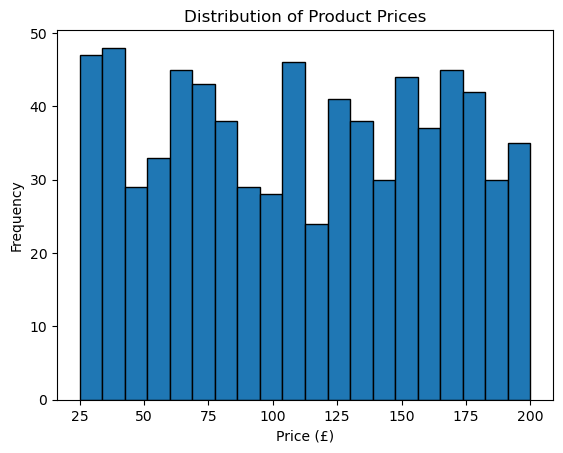

In [39]:
import matplotlib.pyplot as plt

prices = df['Price'].str.replace('£', '').astype(float)  # Convert prices to numeric
plt.hist(prices, bins=20, edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()


## 2. Instock vs Out of Stock 

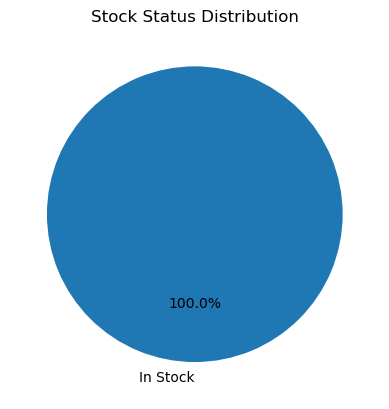

In [60]:
stock_counts = df['Stock Status'].value_counts()

# Pie Chart
stock_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['In Stock', 'Out of Stock'])
plt.title('Stock Status Distribution')
plt.ylabel('')  # Remove y-axis label
plt.show()



## 3. Top Categories by Product Count

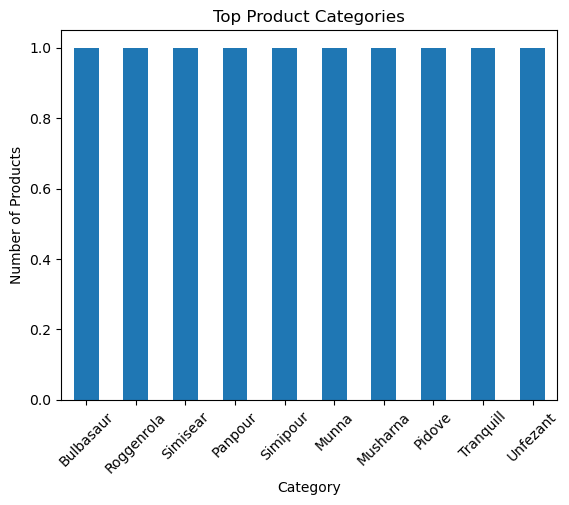

In [62]:
categories = df['Product URL'].str.extract(r'/shop/([^/]+)/')[0]  # Extract categories from URLs
category_counts = categories.value_counts()

category_counts.head(10).plot(kind='bar')
plt.title('Top Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


## 4. Most Expensive Products


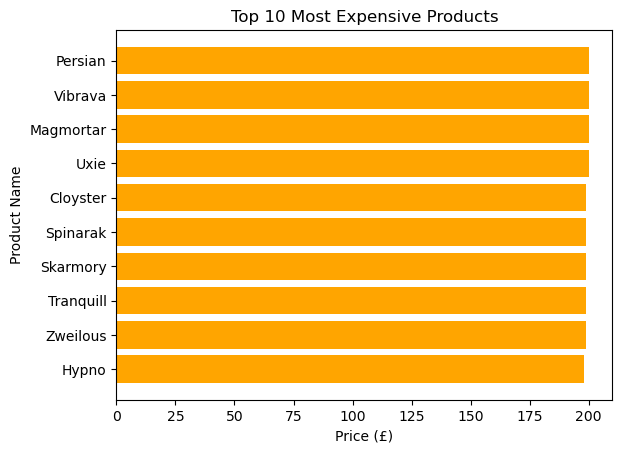

In [72]:
# Ensure all values in 'Price' are strings
df['Price'] = df['Price'].astype(str)

# Remove the '£' symbol and convert to numeric, handling errors
df['Price'] = df['Price'].str.replace('£', '', regex=False)

# Convert to float, replacing non-convertible values with NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Fill missing values (if any) with 0 (or another placeholder)
df['Price'].fillna(0)

# Get the top 10 most expensive products
top_products = df.nlargest(10, 'Price')

# Plot the horizontal bar chart
import matplotlib.pyplot as plt

plt.barh(top_products['Product Name'], top_products['Price'], color='orange')
plt.title('Top 10 Most Expensive Products')
plt.xlabel('Price (£)')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


## 5. Price Trends Across Pages


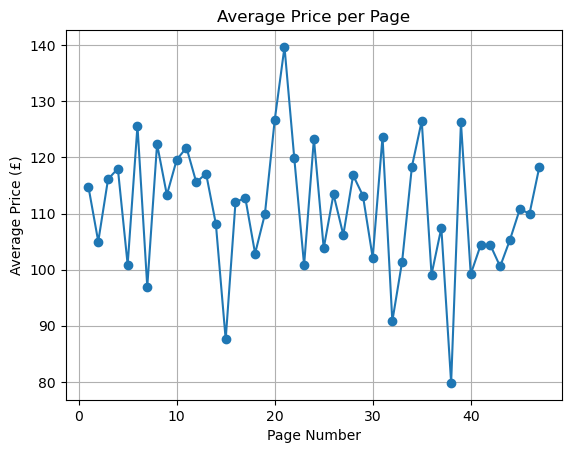

In [68]:
df['Page'] = (df.index // 16) + 1  # Assuming 16 products per page
avg_price_per_page = df.groupby('Page')['Price'].mean()

plt.plot(avg_price_per_page.index, avg_price_per_page.values, marker='o')
plt.title('Average Price per Page')
plt.xlabel('Page Number')
plt.ylabel('Average Price (£)')
plt.grid()
plt.show()
